<h1>Docker</h1>

<h2>🐳 What is Docker?</h2>

- Docker is a tool that lets you package your app and its environment (like Python, libraries, databases) into something called a container.
- A container is a lightweight, standalone unit that runs your app exactly the same on any system — whether it's your laptop, a server, or the cloud.


<h2>💡 Real-World Analogy</h2>

Think of Docker like a shipping container:

- You put your app inside it with everything it needs
- You can move it anywhere (Windows, Linux, cloud)
- It will work the same everywhere

<h2>⚙️ Why Use Docker?</h2>

| Benefit           | Description                                          |
| ----------------- | ---------------------------------------------------- |
| 🔁 Consistency    | No more "It works on my machine" problems            |
| ⚡ Fast            | Containers start in seconds                          |
| 📦 Portable       | Move and run apps anywhere                           |
| 🔒 Isolated       | Each app runs in its own container, safe from others |
| 🔄 Easy to Update | Replace containers without reinstalling everything   |


<h2>🧱 What's Inside a Docker Container?</h2>
A container includes:

1. Your app (e.g., a Python script)
2. System tools and libraries (e.g., Python runtime, Flask)
3. Configurations (env vars, ports, volumes)

<h2>📦 Container vs 🖥️ Virtual Machine (VM)</h2>

| Feature             | 🐳 **Container**                | 🖥️ **Virtual Machine (VM)**              |
| ------------------- | ------------------------------- | ----------------------------------------- |
| **Boot Time**       | Seconds                         | Minutes                                   |
| **Size**            | Lightweight (MBs)               | Heavy (GBs)                               |
| **Isolation**       | Shares host OS kernel           | Full isolation with guest OS              |
| **Performance**     | Near-native                     | Slower due to virtualization overhead     |
| **OS per Instance** | Not needed (shares host OS)     | Each VM runs a full OS                    |
| **Use Case**        | Microservices, fast deployments | Legacy apps, full OS emulation            |
| **Resource Usage**  | Low (uses host kernel)          | High (dedicated memory, disk, CPU)        |
| **Portability**     | Very portable                   | Less portable (hardware-specific configs) |
| **Example Tool**    | Docker                          | VirtualBox, VMware, Oracle VM, Hyper-V    |


<h2>Docker Setup</h2>


---

## 🏗️ 3. Docker Architecture

---

Docker uses a **Client-Server** architecture:

### Components:

- **🧩Client (`docker`)**:

  -  The command-line tool you use (docker run, docker build, etc.).
  -  Sends requests to the Docker daemon via REST API.

---
- **⚙️Daemon (`dockerd`)**: 

    - The background service running on your system.
    - Manages:
        - Containers
        - Images
        - Volumes
        - Networks
    - Receives commands from the Docker CLI.

---
- **🧱Docker Images**: 

    - Read-only templates used to create containers.
    - Think of it like a snapshot of your app and environment.
    - Examples:
        - python:3.11
        - ubuntu:20.04
    - Custom images (Dockerfile builds)

---
- **🧊Docker Containers**:

  
    - Running instances of images.
    - Lightweight, isolated environments that share the host OS kernel.
    - Can be started, stopped, restarted, deleted.

---
- **🗃 Dockerfile**:

    - Blueprint to build custom Docker images.
    - A text file with instructions to build a Docker image.

---
- **🌐Docker Hub**:

    - Public image registry (like GitHub for Docker).
    - A cloud-based repository where you can pull or push images.

---
### 🔄 Flow:
```text
[ You (CLI) ]
     |
[ Docker Client ] ---> [ Docker Daemon ]
                               |
       --------------------------------------------------
       |            |               |                  |
     [ Images ]   [ Containers ]  [ Volumes ]     [ Networks ]


<h2>🐳 Install Docker on Ubuntu (Step-by-Step)</h2>
<a href="https://docs.docker.com/engine/install/ubuntu/#installation-methods" target="_blank">Docker Installation Methods (Ubuntu)</a>


<h2>Docker Playground</h2>
If you can't install Docker on your system, you can also look into this online playground: 
<a href="https://labs.play-with-docker.com/" target="_blank">Docker Playground</a>


<h2>To completely uninstall Docker</h2>
<h2>⚠️Warning: This will remove everything related to Docker.</h2>

1. ## 🔥 Step 1: Stop Docker Services
```
    - sudo systemctl stop docker
    - sudo systemctl stop containerd
```
2. ## 🧼 Step 2: Remove Docker Packages

```
    - sudo apt purge -y docker-ce docker-ce-cli containerd.io docker-buildx-plugin docker-compose-plugin

```
3. ## 🧹 Step 3: Delete Docker Files and Folders
   This deletes all containers,images,volumes,Docker configuration files
```
    - sudo rm -rf /var/lib/docker
    - sudo rm -rf /var/lib/containerd
    - sudo rm -rf /etc/docker
    - sudo rm -rf ~/.docker
```
    
4. ## 📦 Step 4: Autoremove Leftover Dependencies

```
    - sudo apt autoremove -y
```
5. ## ✅ Step 5: Confirm Docker is Gone
```
   - docker --version

```

<h2>Dockerfile Keywords Explained </h2>

---


| Keyword   | Purpose                                         | Example                               |
| --------- | ----------------------------------------------- | ------------------------------------- |
| `FROM`    | Sets the **base image** to build from           | `FROM python:3.11-slim`               |
| `WORKDIR` | Sets the **working directory** inside container | `WORKDIR /app`                        |
| `COPY`    | **Copies files** from host to container         | `COPY . /app`                         |
| `RUN`     | Runs a command **while building the image**     | `RUN pip install -r requirements.txt` |
| `EXPOSE`  | Declares the **port** the container listens on  | `EXPOSE 5000`                         |
| `CMD`     | Sets the **default command** to run on start    | `CMD ["python", "app.py"]`            |


# 🐳 Key Commands

---

## 🧱 `FROM`

**Purpose:**  
Specifies the **base image** for building your Docker image. It is the **first instruction** in a Dockerfile.

**Example:**
```Dockerfile
FROM python:3.11-slim
```

This means: use the official Python 3.11 slim image from Docker Hub.

---

## 📁 `WORKDIR`

**Purpose:**  
Sets the **working directory** inside the container.  
All paths will be **relative** to this directory.

**Example:**
```Dockerfile
WORKDIR /app
```

---

## 📂 `COPY`

**Purpose:**  
Copies files and directories from the **host machine** into the **container's filesystem**.

**Example:**
```Dockerfile
COPY . /app
```

This copies everything in the current directory into `/app` in the container.

---

## ⚙️ `RUN`

**Purpose:**  
Executes a command during **image build time**.  
Typically used to install packages or setup environments.

**Example:**
```Dockerfile
RUN pip install -r requirements.txt
```

---

## 🌐 `EXPOSE`

**Purpose:**  
Documents the **port** the container listens on.  
This does **not publish** the port itself.

**Example:**
```Dockerfile
EXPOSE 5000
```

Useful when running web servers (e.g., Flask, Node.js).

---

## 🚀 `CMD`

**Purpose:**  
Specifies the **default command** to run when the container starts.  
Only **one `CMD`** is allowed — the last one overrides previous ones.

**Example:**
```Dockerfile
CMD ["python", "app.py"]

```

This starts your app when the container is run.


# 🚀 `docker run -p` – Quick Guide

---

## 🔹 Syntax

```bash
docker run -p <host-port>:<container-port> <image-name>
```

---

## 🔹 Example

```bash
docker run -p 8000:5000 flask-app
```

- App inside container runs on **5000**
- You access it at: `http://localhost:8000`

---

## 🔹 When to Use

If your Dockerfile has:

```Dockerfile
EXPOSE 5000
```

Run:

```bash
docker build -t flask-app .
docker run -p 8000:5000 flask-app
```

---

## 🔹 Summary

| Term               | Meaning                            |
|--------------------|-------------------------------------|
| `5000`             | Port inside container (EXPOSE)      |
| `8000`             | Port on your host (browser access)  |

--- 


# 🧱 Docker Image Layers

---

## 🔹 What Are Layers?

- Docker images are built in **layers**
- Each instruction in the `Dockerfile` creates a **new layer**
- Layers are **cached** to speed up builds

---

## 🔹 Common Layer-Creating Instructions

Image Layers and Metadata

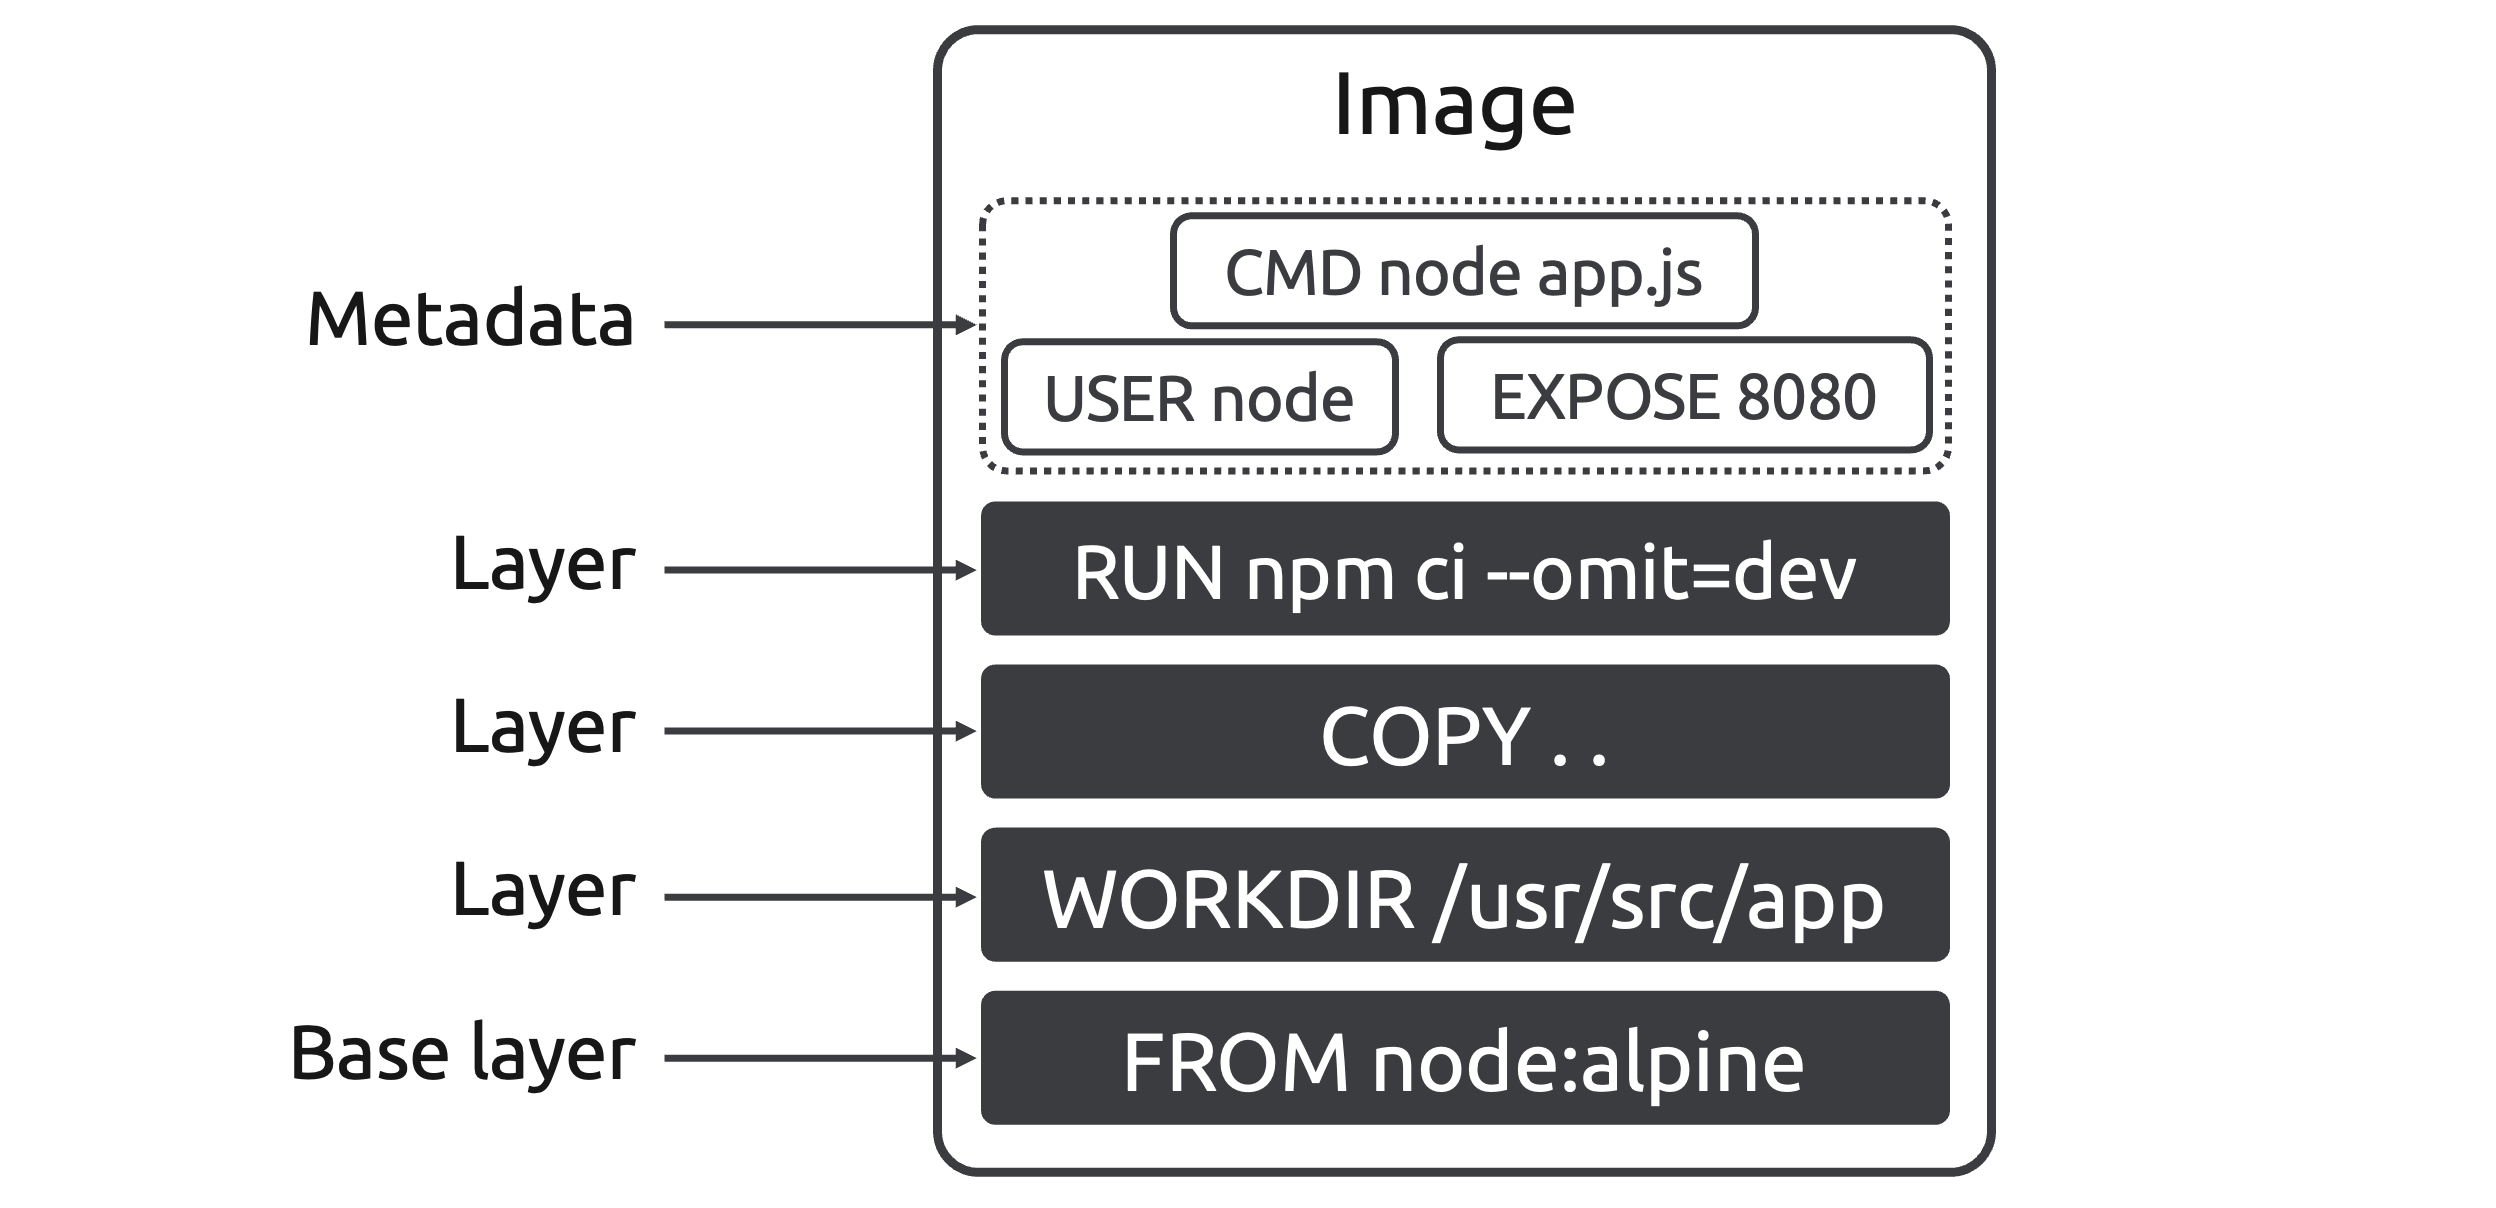
---

## 🔹 Benefits of Layers

- ✅ Faster builds (uses cache)
- ✅ Smaller image sizes (reuses unchanged layers)
- ✅ Efficient updates (only changed layers are rebuilt)

---

## 🔹 Best Practices

- Put `COPY` and `RUN` commands **after installing dependencies**
- Combine steps when possible to **reduce number of layers**

```Dockerfile
RUN apt-get update && apt-get install -y python3
```

---

## 🔹 Summary

| Layer      | Created by               | Cached? |
|------------|--------------------------|---------|
| Base       | `FROM`                   | Yes     |
| Directory  | `WORKDIR`                | Yes     |
| Code       | `COPY`, `ADD`            | Yes     |
| Install    | `RUN pip install ...`    | Yes     |
| Start Cmd  | `CMD`, `ENTRYPOINT`      | Yes     |

---


## Multi-architecture images
- Running a docker build command with the <b>--platform</b> flag allows you to build images for platforms that are different from your Docker host. 
- Use `--platform` to **specify the target CPU architecture** or **OS** when building or running Docker images.
- 🔹Syntax :
    - docker run --platform <os/arch> <image>
    - docker build --platform=linux/amd64,linux/arm64 -t nigelpoulton/gsd-book:latest --push --no-cache
- ## 🔄 Common Platforms

| Platform         | Meaning                              |
|------------------|---------------------------------------|
| `linux/amd64`    | 64-bit x86 Linux (Intel/AMD CPUs)     |
| `linux/arm64`    | 64-bit ARM (e.g., Apple M1/M2, Pi 4)  |
| `linux/arm/v7`   | 32-bit ARM                            |
| `windows/amd64`  | Windows containers                    |



### Docker Registries
- You push images to registries with the docker push command. 
- If you don’t specify a registry, it assumes you want to push to Docker Hub. 
- The same applies to docker pull commands — if you don’t specify a registry, it assumes you want to pull from Docker Hub.

# 🧩 Docker Compose – Multi-Container Management
---

## 🔹 What is Docker Compose?

- A tool for **defining and running multi-container Docker applications**
- Uses a **`docker-compose.yml`** file to configure services
- Allows you to run everything with **a single command**

---
## 🔹 Why Use Compose?

✅ Manage multiple containers easily  
✅ Use named networks and shared volumes  
✅ Declarative configuration (YAML file)  
✅ Great for microservices and dev environments

---

## 🔹 Example: 
- The web container runs a Python flask app that displays a simple web page with a picture, some text, and a counter. 
- The app counts the number of page refreshes and stores the value in a Redis database in the store container. If you refresh the page 10 times, the counter in the database will increment each time, and the web page will display the current counter value.

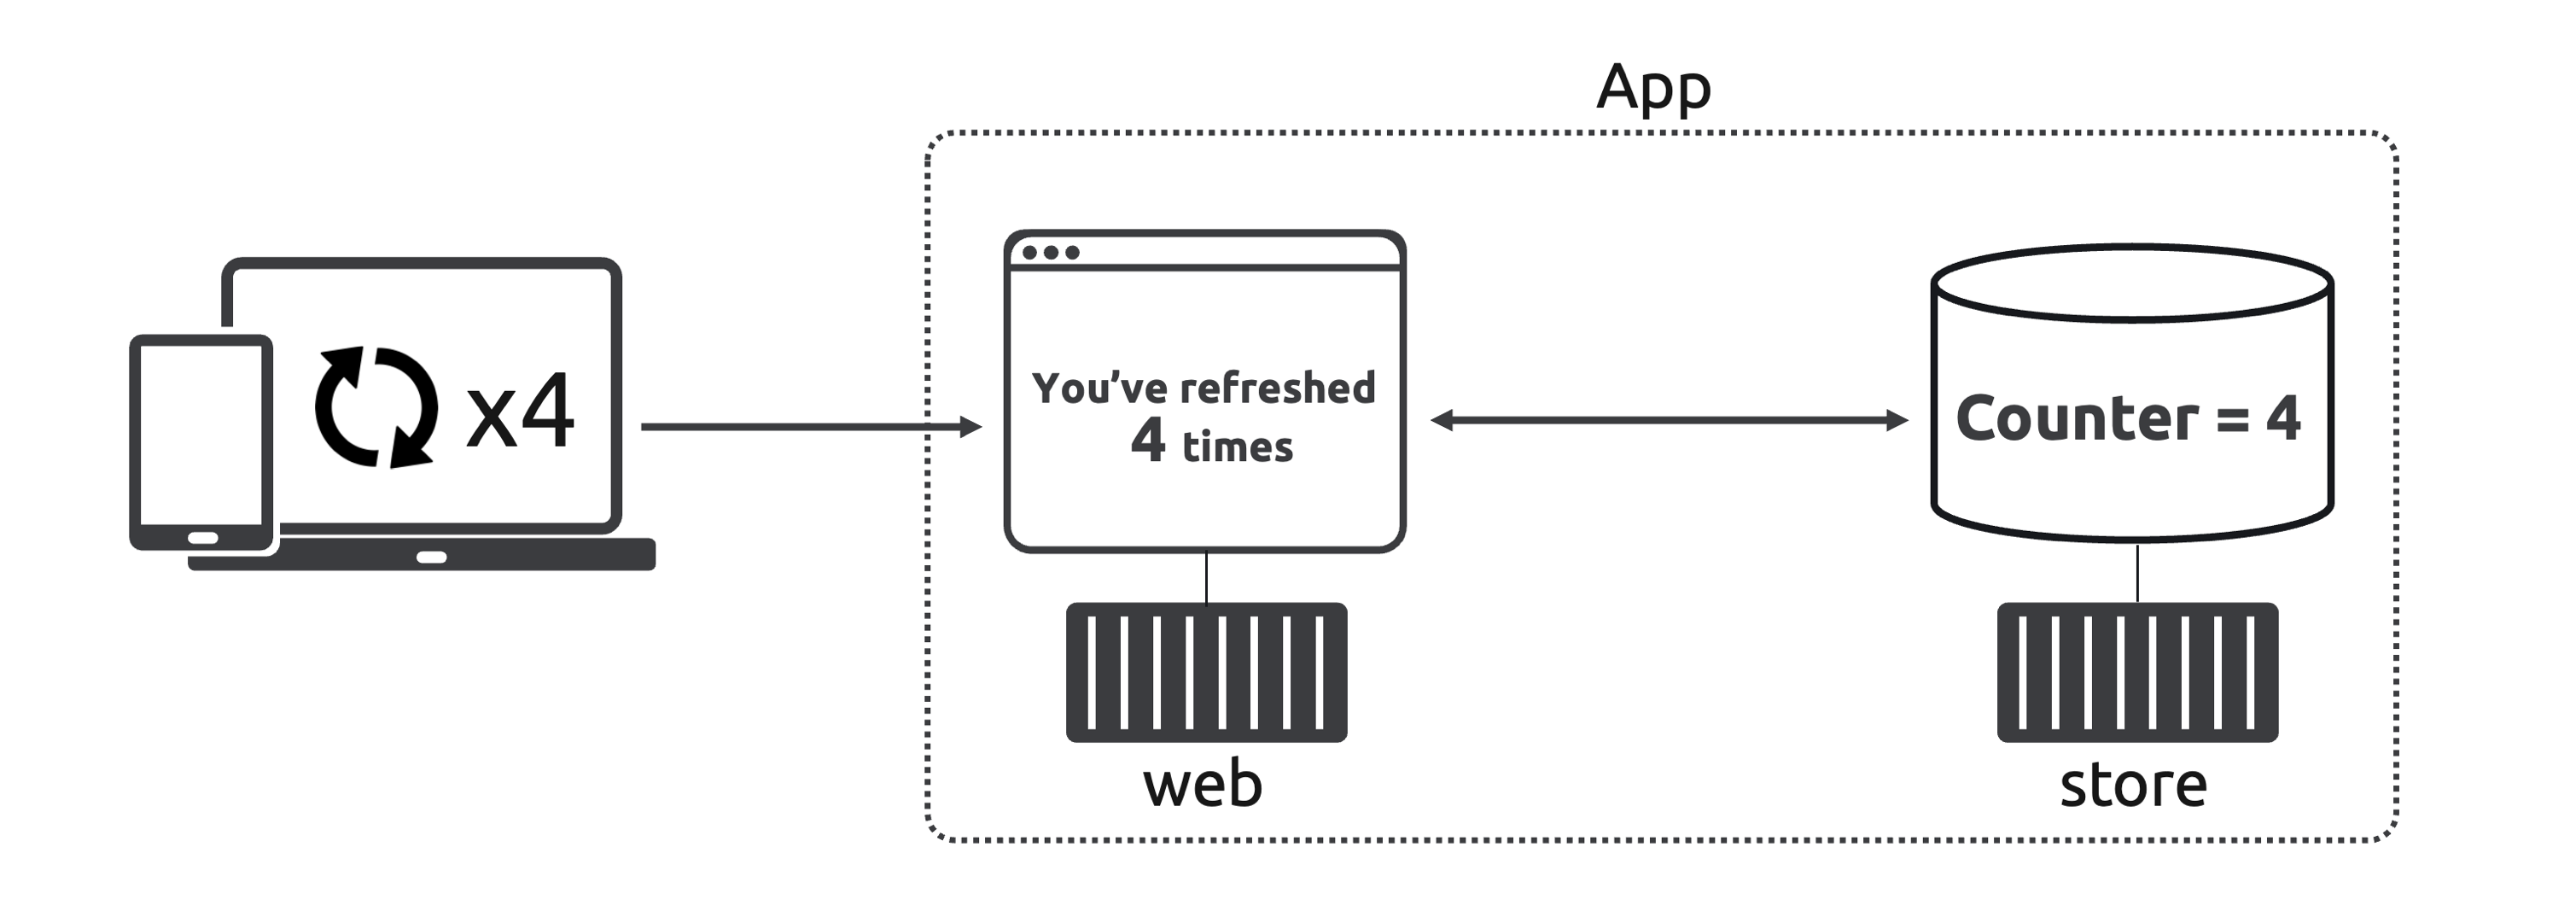

- Compose refers to containers as services; this file defines one called web and another called store. 
- It also defines a network called internal.

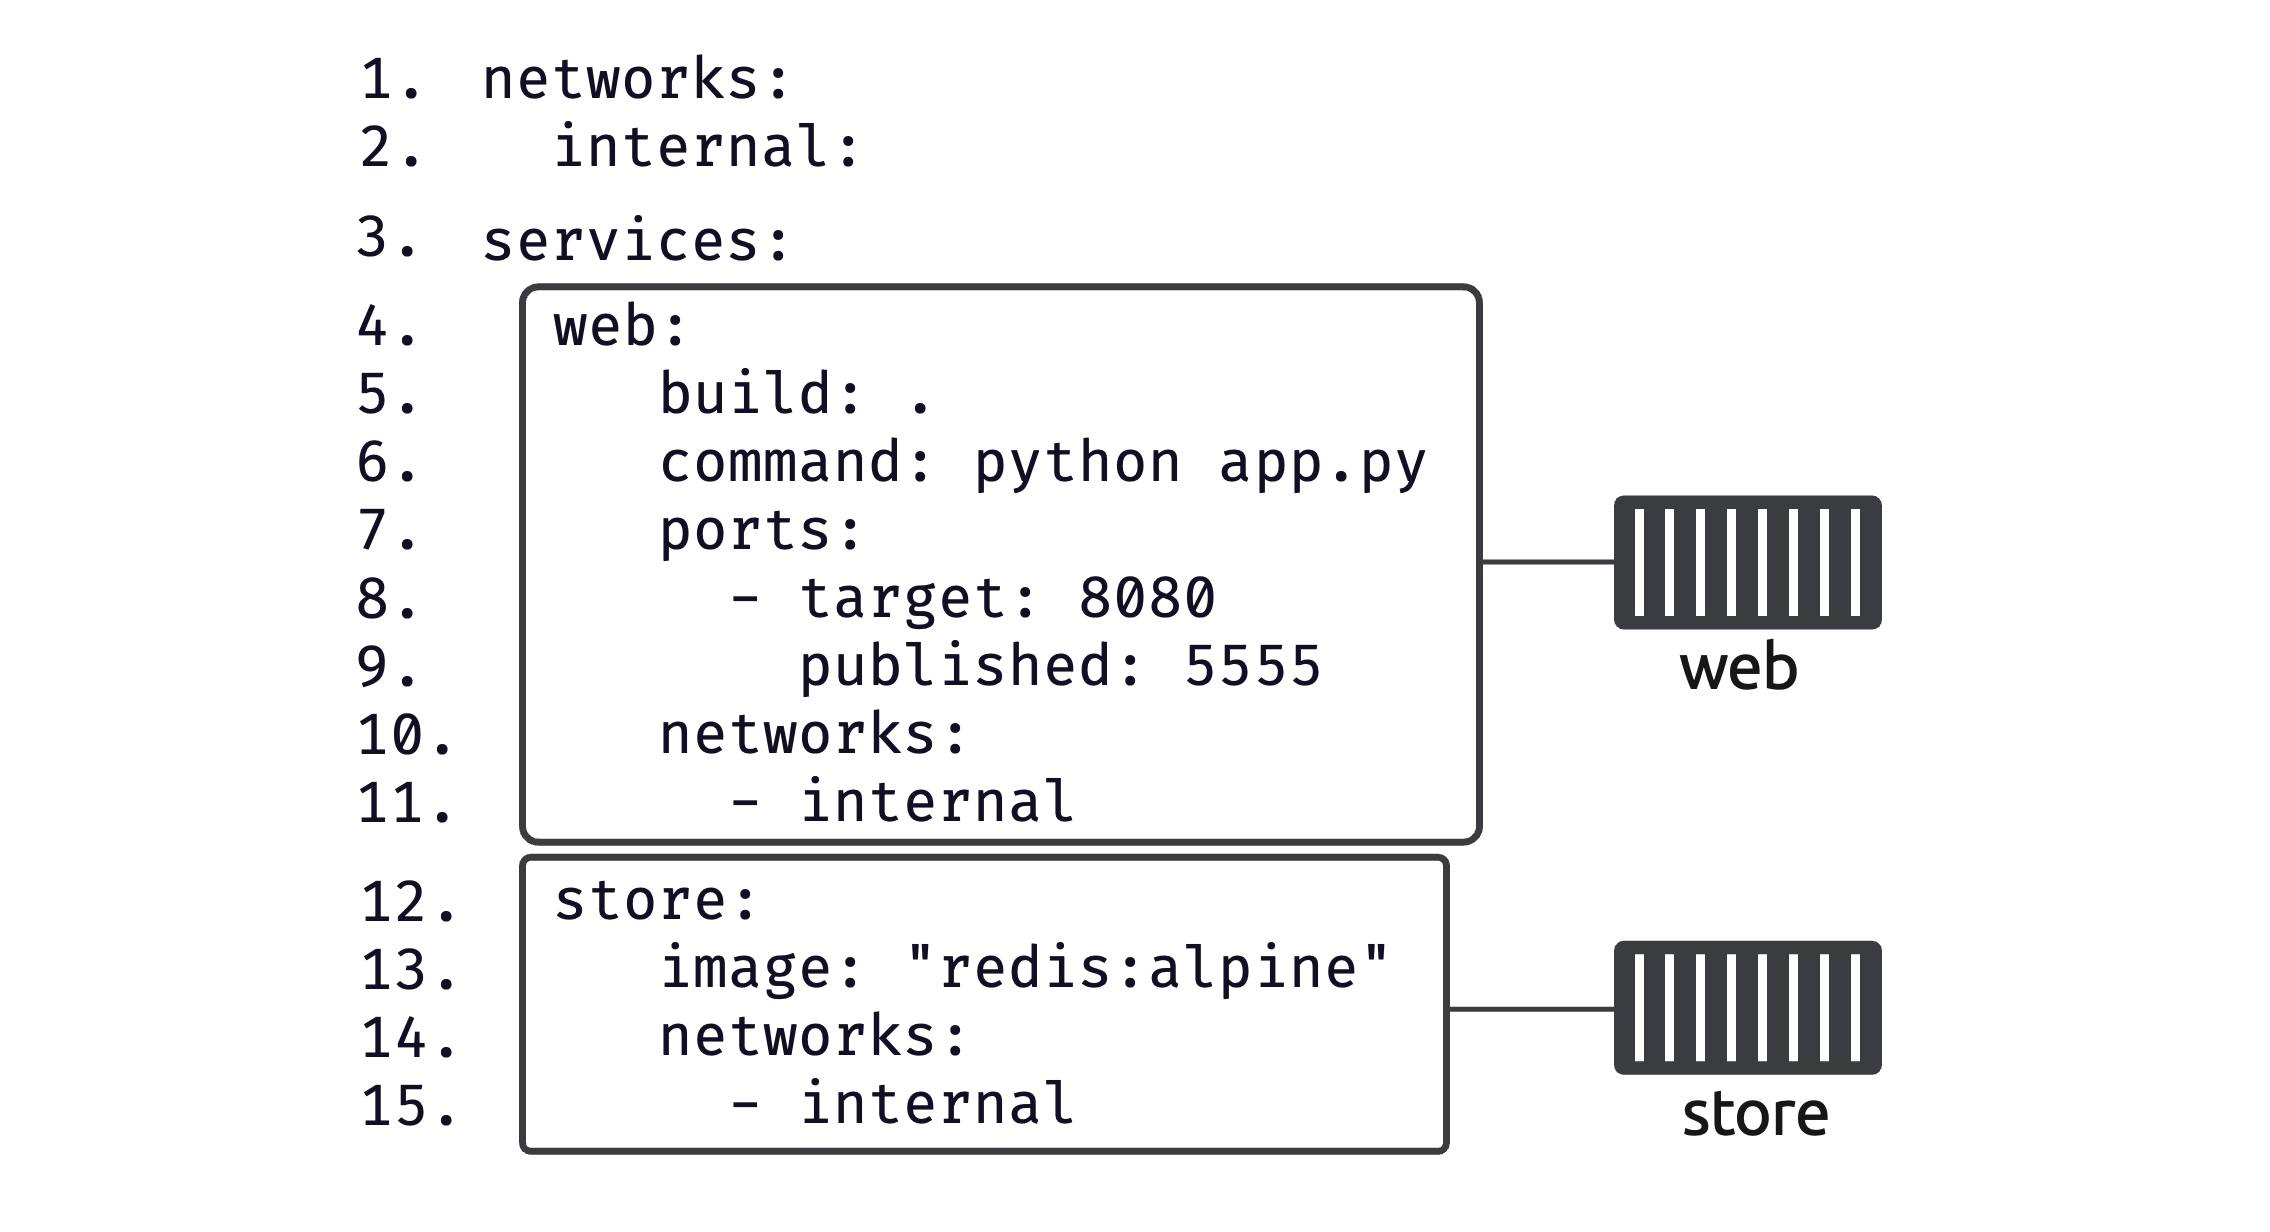

- The first two lines define a network called internal. Docker Compose will read these lines and create a container network called internal.
- Line 3 defines a new block called services. Both of the containers are defined under this block.
- Lines 4-11 define the web service (container).
- Line 5 tells Docker to build the image for this container from the Dockerfile in the same directory.
- Line 6 is the command the container should run to start the app. 
-  Lines 7-9 map port 8080 inside the container to port 5555 on the Docker host. 
- Finally, lines 10-11 attach the container to the internal network.
- Lines 12-15 define another service (container) called store. 
- Line 13 tells Docker to pull the redis:alpine image for this container, and lines 14 and 15 attach it to the same internal network.
- It shows the web and store containers both connected to the internal network. The web container maps port 8080 inside the container to 5555 on the host. The web container also connects to the store container on port 6379.

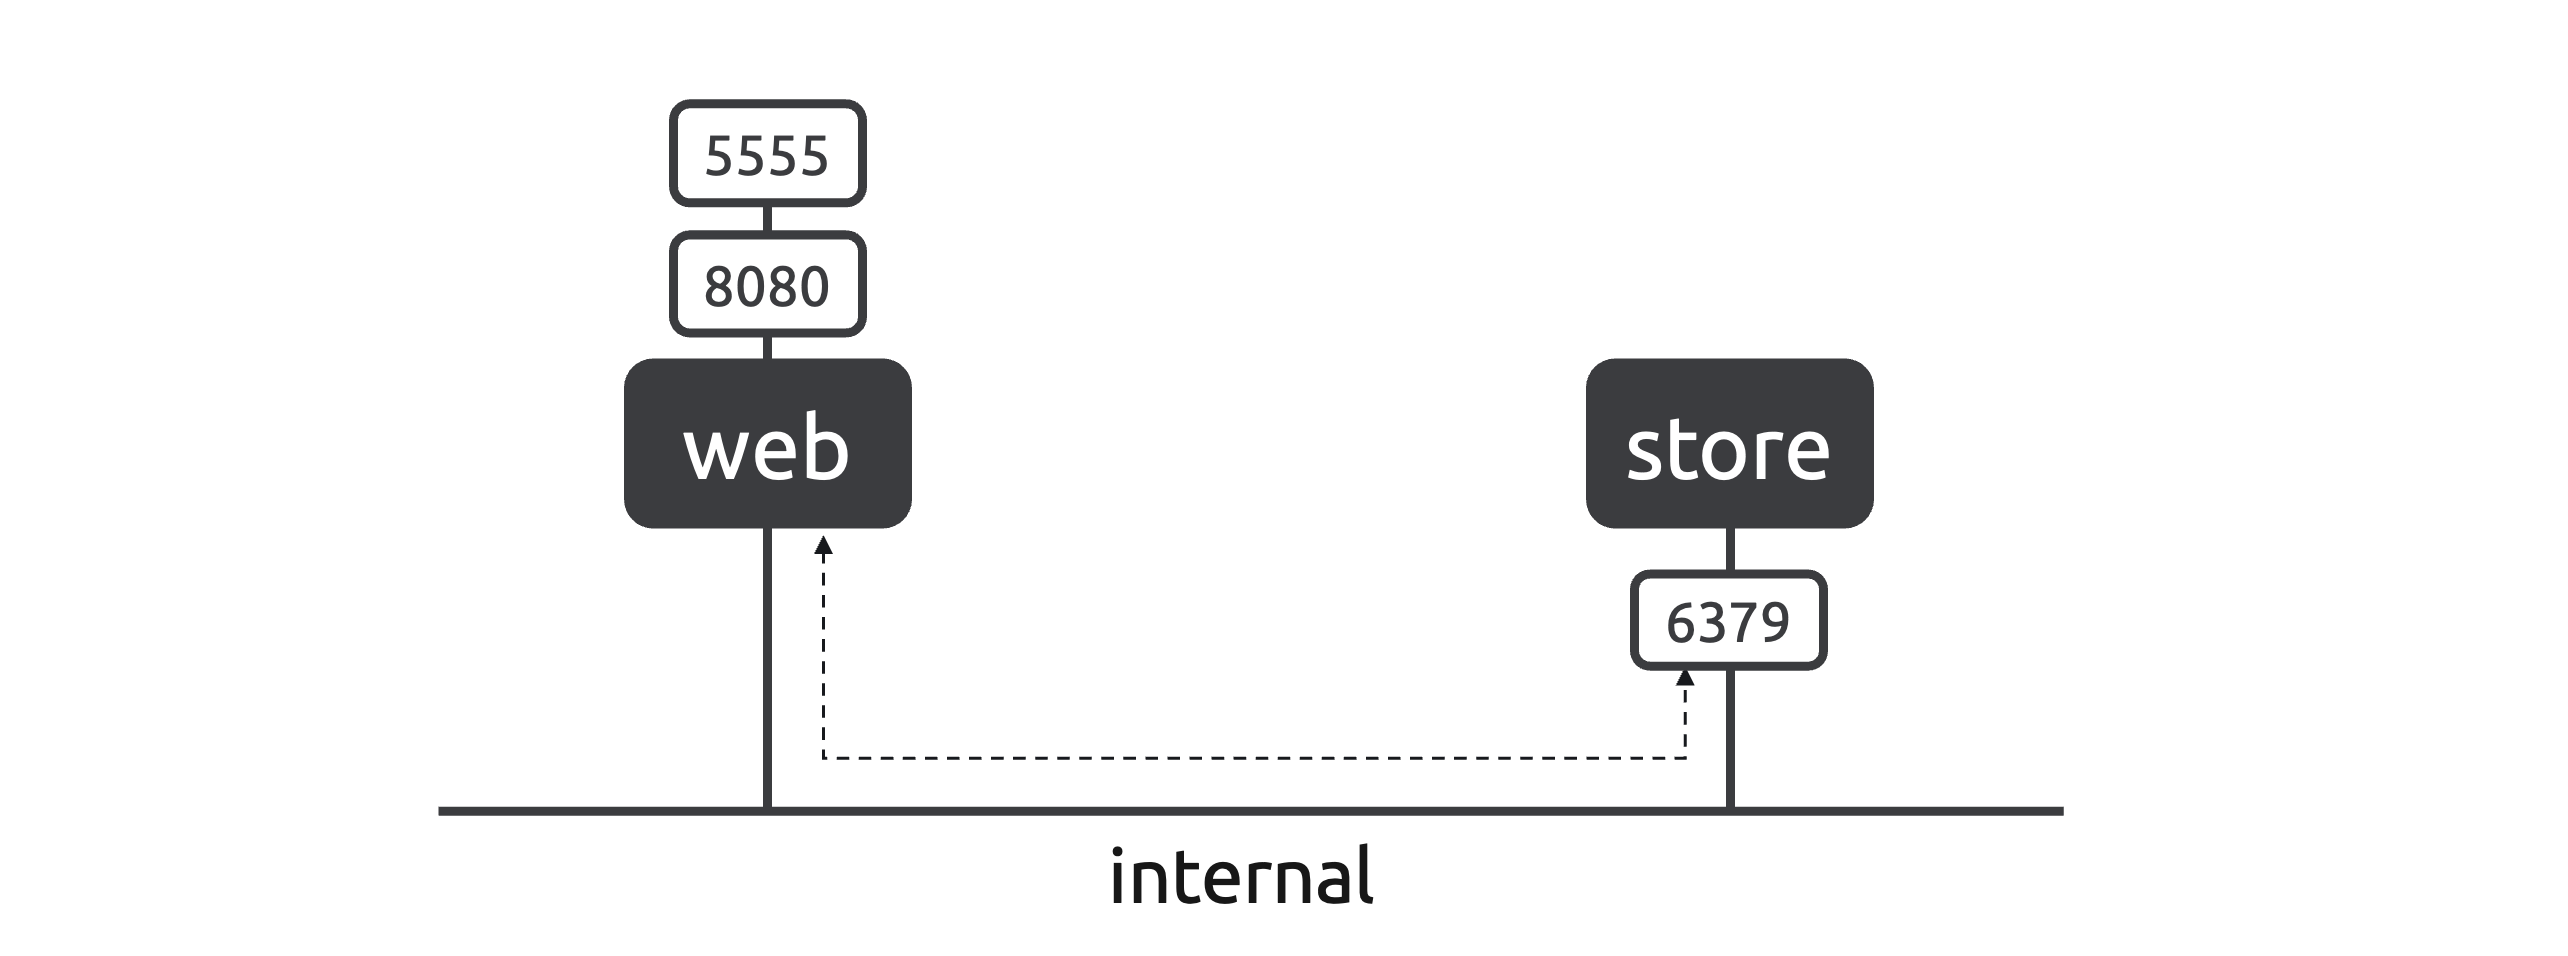


# 🧹 Docker Cleanup Commands: `--rm`, `rm`, `rmi`, `prune`

---

## 🔹 `--rm`

Used with `docker run` to **automatically remove the container** after it stops.

```bash
docker run --rm <image>
```

✅ Great for **temporary containers** (e.g., testing, debugging)  
❌ Cannot inspect or restart the container later

---

## 🔹 `docker rm`

Removes a **stopped container**.

```bash
docker rm <container_id>
```

- Use `-f` to force-remove running containers:  
  ```bash
  docker rm -f <container_id>
  ```

---

## 🔹 `docker rmi`

Removes **Docker images**.

```bash
docker rmi <image_id>
```

- Use `-f` to force removal (even if used by stopped containers):  
  ```bash
  docker rmi -f <image_id>
  ```

---

## 🔹 `docker system prune`

Deletes **all unused containers, networks, images**, and **build cache**.

```bash
docker system prune
```

- Aggressive cleanup (removes **all** unused images too):
  ```bash
  docker system prune -a
  ```

- Clean up unused **volumes**:
  ```bash
  docker volume prune
  ```

---

## 🧾 Summary Table

| Command                        | What It Does                                | Use Case                         |
|-------------------------------|---------------------------------------------|----------------------------------|
| `--rm`                        | Auto-remove container after `run`           | One-time/temporary runs          |
| `docker rm <id>`              | Remove stopped container                    | Clean up container list          |
| `docker rmi <id>`             | Remove image                                | Free up image space              |
| `docker system prune`         | Remove unused containers/images/networks    | Light cleanup                    |
| `docker system prune -a`      | Aggressive full cleanup                     | Free maximum space               |
| `docker volume prune`         | Clean unused volumes                        | Free space from old volumes      |

---

## 💡 Tip

Check disk usage before/after with:

```bash
docker system df
```

---


# 📂 `docker cp` – Copy Files To/From Containers

---

## 🔹 Syntax

```bash
docker cp <source> <destination>
```

---

## 🔹 Copy From Container to Host

```bash
docker cp <container_id>:<container_path> <host_path>
```

📦 Example:

```bash
docker cp myapp:/app/log.txt ./log.txt
```

✅ Copies `log.txt` from inside container `myapp` to your local folder.

---

## 🔹 Copy From Host to Container

```bash
docker cp <host_path> <container_id>:<container_path>
```

📦 Example:

```bash
docker cp config.json myapp:/app/config.json
```

✅ Copies `config.json` from your local machine into the container `myapp`.

---

## 🧾 Summary Table

| Task                        | Command Format                                           |
|-----------------------------|----------------------------------------------------------|
| Copy container → host       | `docker cp <cid>:<path> <host-path>`                    |
| Copy host → container       | `docker cp <host-path> <cid>:<path>`                    |
| Relative paths supported    | Yes                                                     |
| Works on stopped containers | ✅ Yes                                                   |

---

## 💡 Tip

Use `docker inspect <cid>` to find exact paths inside containers if unsure.

---
